In [2]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

con = psycopg2.connect("dbname=asbuilt_trax user=postgres host=localhost port=5432")

In [9]:
def sql_to_df(sql_query: str):
    """Get result set of sql_query as a pandas DataFrame."""
    return pd.read_sql(sql_query, con)



title = "As-builts by Crew Leader"
query = """
        SELECT COUNT(a.*) as count, c.name
        FROM asbuilts a
        JOIN crew_leaders c
        ON a.crew_leader_id = c.pk_id
        GROUP BY c.name
        ORDER BY count desc;
        """

/Users/rpemb/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


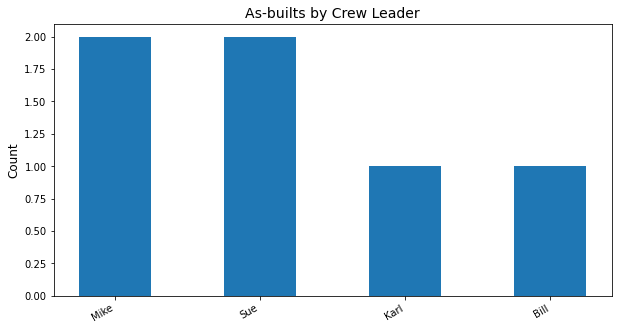

In [15]:
dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

# get evenly spaced x-axis positions
xpos = np.arange(len(dataframe))
# at each x, add bar (height based on count data)
axes.bar(xpos, dataframe["count"], width=0.5)
# at each x, add tick mark
axes.set_xticks(xpos)
# at each x, add label based on dept data
axes.set_xticklabels(dataframe["name"])
# label y-axisre
axes.set_ylabel("Count", fontsize=12)
# rotate x-axis labels to prevent overlap
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()